/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


0.31545982


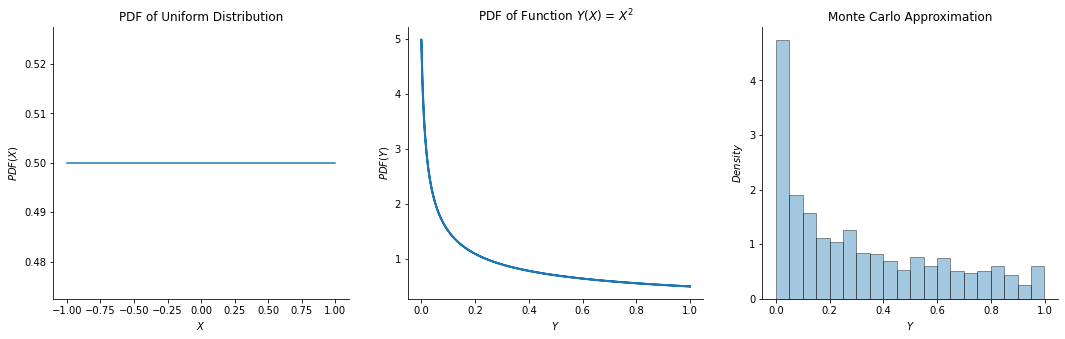

In [2]:
import jax.numpy as jnp
from jax import random


import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify


latexify(width_scale_factor=1, fig_height=2)


xs = jnp.linspace(-1, 1, 200)
a = -1
b = 1
px = 1 / (b - a) * jnp.ones(len(xs))

fn = lambda x: x**2
ys = fn(xs)

# analytic
ppy = 1 / (2 * jnp.sqrt(ys + 1e-2))

# monte carlo
n = 1000

key = random.PRNGKey(0)
samples = random.uniform(key, shape=(n, 1), minval=a, maxval=b)
samples2 = fn(samples)

print(jnp.mean(samples2))


fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].set_title("PDF of Uniform Distribution")
ax[0].plot(xs, px, "-")
ax[0].set_xlabel("$X$")
ax[0].set_ylabel("$PDF(X)$")


ax[1].set_title("PDF of Function $Y(X)$ = $X^2$")
ax[1].plot(ys, ppy, "-", linewidth=2)

ax[1].set_xlabel("$Y$")
ax[1].set_ylabel("$PDF(Y)$")

ax[2].set_title("Monte Carlo Approximation")
sns.distplot(samples2, kde=False, ax=ax[2], bins=20, norm_hist=True, hist_kws=dict(edgecolor="k", linewidth=1))
ax[2].set_xlabel("$Y$")
ax[2].set_ylabel("$Density$")


sns.despine()
savefig("changeOfVars")
plt.show()